In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')
%matplotlib inline

In [28]:
df=pd.read_csv("bmi.csv")

In [29]:
df.shape

(500, 4)

In [30]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [31]:
df.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [32]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [33]:
df.isnull()

,Gender,Height,Weight,Index
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
495,False,False,False,False
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False


In [34]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [36]:
df.Gender.nunique()

2

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

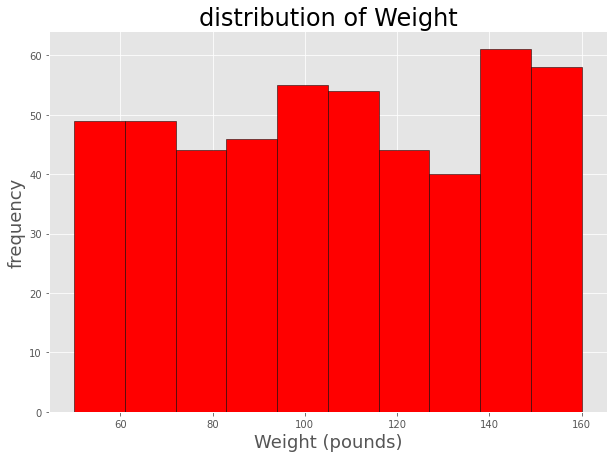

In [38]:
df.Weight.plot(kind='hist',color='red',edgecolor='black',figsize=(10,7))
plt.title('distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('frequency', size=18);               

AttributeError: module 'matplotlib.pyplot' has no attribute 'titledf'

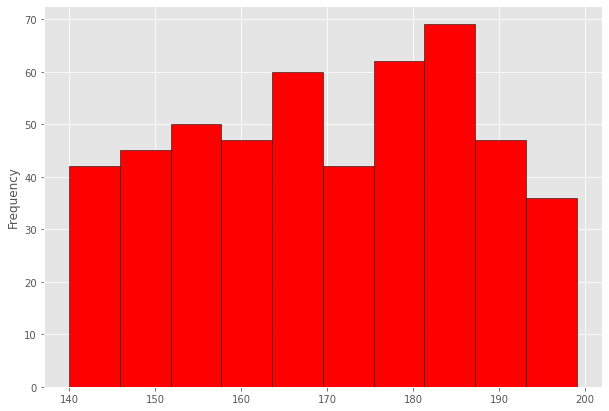

In [39]:
df.Height.plot(kind='hist',color='red',edgecolor='black',figsize=(10,7))
plt.titledf.Weight.plot(kind='hist',color='red',edgecolor='black',figsize=(10,7))
plt.title('distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('frequency', size=18);               
plt.xlabel('Height (pounds)', size=18)
             

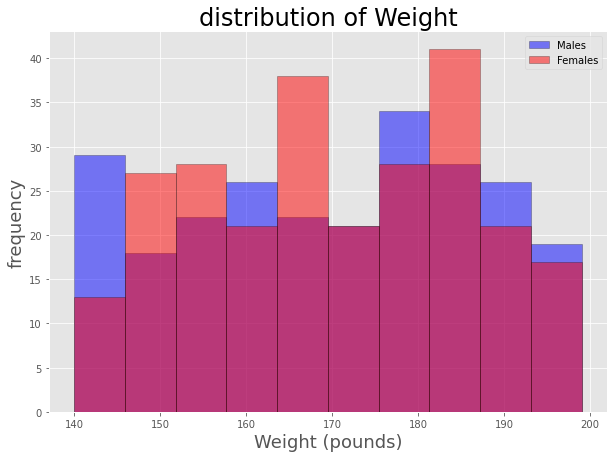

In [40]:
df[df['Gender']=='Male'].Height.plot(kind='hist',color='blue',edgecolor='black', alpha=0.5, figsize=(10,7))
df[df['Gender']=='Female'].Height.plot(kind='hist',color='red',edgecolor='black', alpha=0.5, figsize=(10,7))   
plt.legend(labels=['Males', 'Females'])
plt.title('distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)   
plt.ylabel('frequency', size=18);        

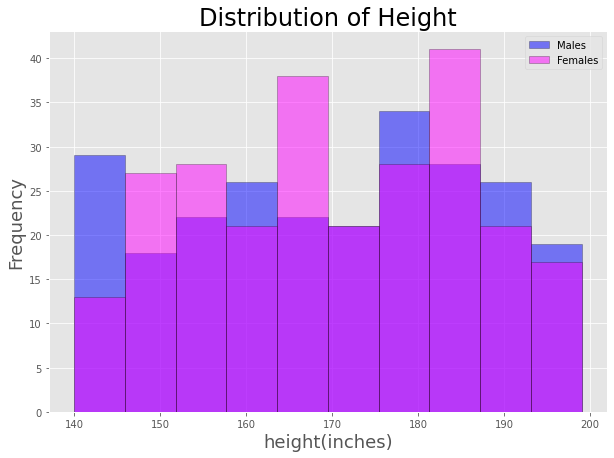

In [41]:
df[df['Gender']=='Male'].Height.plot(kind='hist',color='blue', edgecolor='black',alpha=0.5, figsize=(10,7))
df[df['Gender']=='Female'].Height.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height',size=24)
plt.xlabel('height(inches)', size=18)
plt.ylabel('Frequency',size=18);

In [42]:
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

In [43]:
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

In [44]:
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Index_male,Height_female,Weight_female,Index_female
count,245.000000,245.000000,245.000000,255.000000,255.000000,255.000000
mean,169.648980,106.314286,3.787755,170.227451,105.698039,3.709804
std,17.065665,31.832734,1.386355,15.711825,32.962025,1.325886
min,140.000000,50.000000,0.000000,140.000000,50.000000,0.000000
25%,154.000000,80.000000,3.000000,157.000000,79.000000,3.000000
50%,171.000000,105.000000,4.000000,170.000000,106.000000,4.000000
75%,183.000000,137.000000,5.000000,184.000000,135.000000,5.000000
max,199.000000,160.000000,5.000000,199.000000,160.000000,5.000000


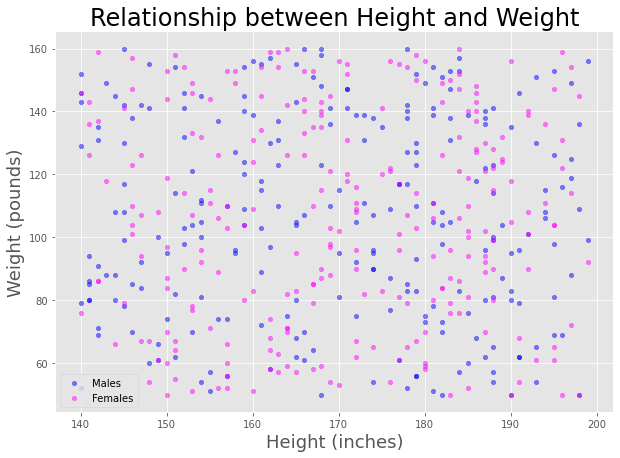

In [45]:
ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

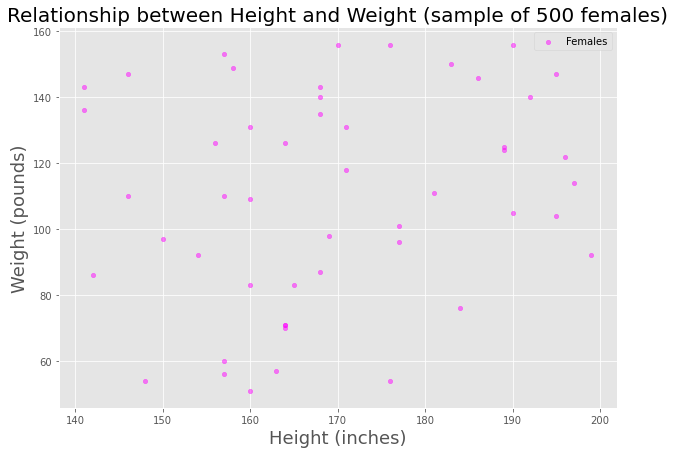

In [46]:
sample_females = df[df['Gender'] == 'Female'].sample(50)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [47]:
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

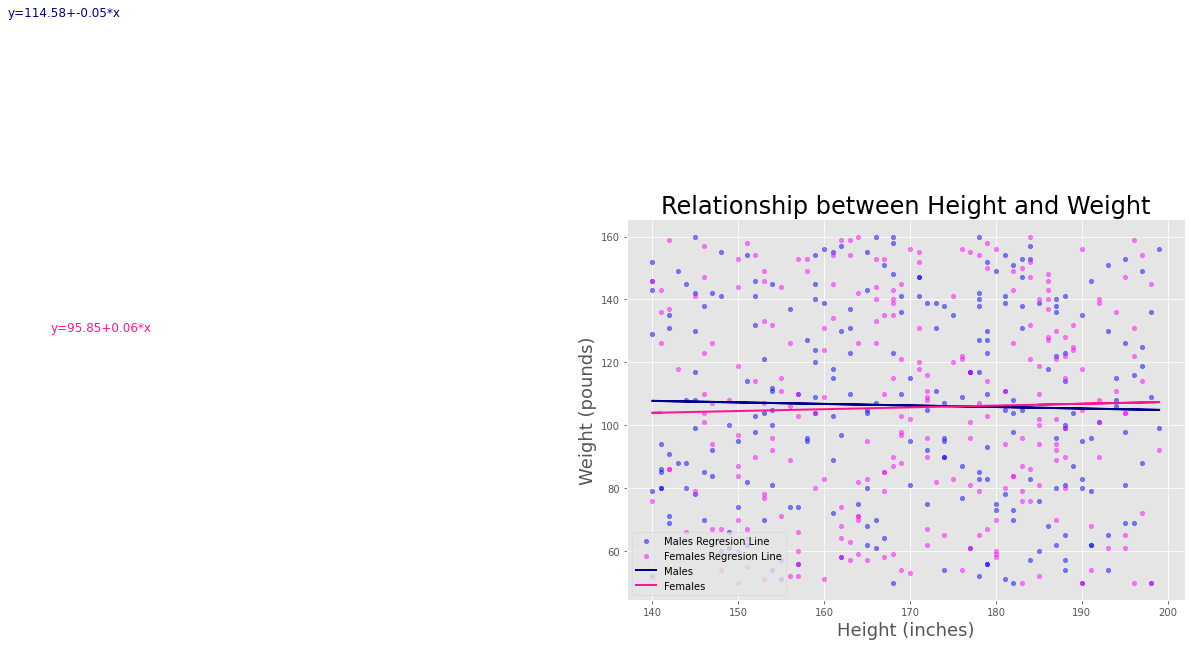

In [61]:
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)

plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

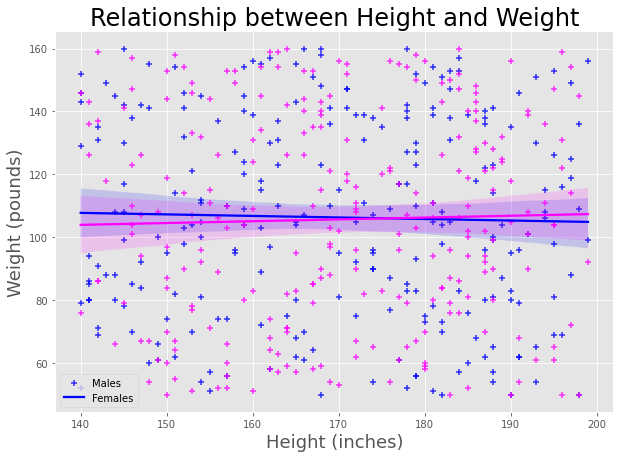

In [49]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

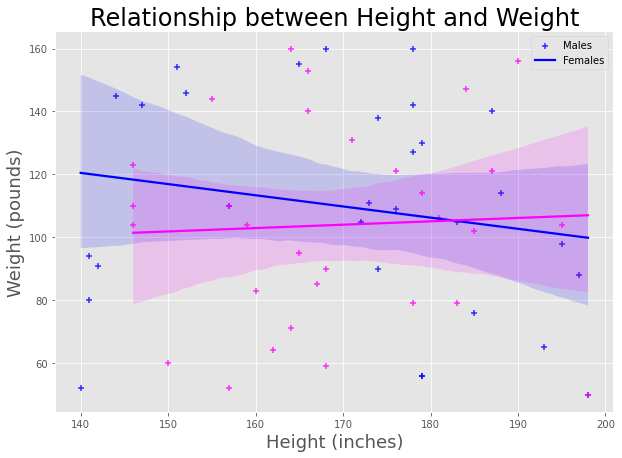

In [64]:
df_males_sample = df[df['Gender'] == 'Male'].sample(30)
df_females_sample = df[df['Gender'] == 'Female'].sample(30)
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta', marker='+')
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [51]:
from sklearn.linear_model import LinearRegression
df_males = df[df['Gender'] == 'Male']
lr_males = LinearRegression()
lr_males.fit(df_males[['Height']], df_males['Weight'])
print(lr_males.intercept_)
print(lr_males.coef_)
df_females = df[df['Gender'] == 'Female']
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])
print(lr_females.intercept_)
print(lr_females.coef_)

114.58397655987221
[-0.04874589]
95.85267170072629
[0.05783654]


In [52]:
df_females = df[df['Gender'] == 'Female']
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
print(np.polyval(female_fit, [60]))
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])
print(lr_females.predict([[60]]))

[99.32286436]
[99.32286436]


In [53]:
df_females = df[df['Gender'] == 'Female']
df_females.corr()

,Height,Weight,Index
Height,1.000000,0.027569,-0.362132
Weight,0.027569,1.000000,0.819280
Index,-0.362132,0.819280,1.000000


In [54]:
df_males = df[df['Gender'] == 'Male']

# correlation coefficients 
df_males.corr()

,Height,Weight,Index
Height,1.000000,-0.026133,-0.476934
Weight,-0.026133,1.000000,0.790888
Index,-0.476934,0.790888,1.000000


In [55]:
from scipy import stats
df_females = df[df['Gender'] == 'Female']
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)

print(pearson_coef)
df_males = df[df['Gender'] == 'Male']
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print(pearson_coef)

0.027568624092019253
-0.026132882097317355


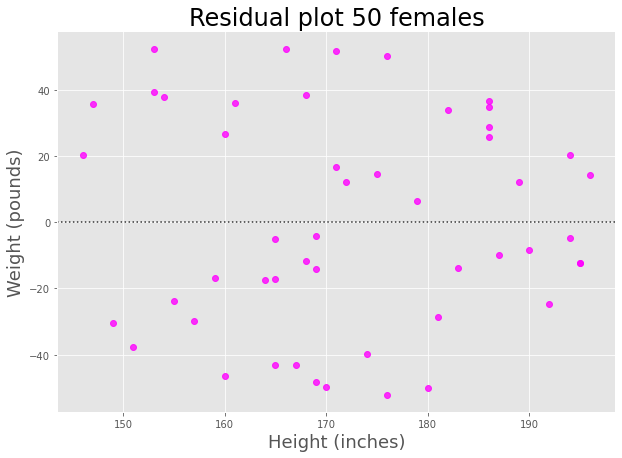

In [56]:
import seaborn as sns
df_females = df[df['Gender'] == 'Female'].sample(50)
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_females.Height, df_females.Weight, color='magenta')
plt.title('Residual plot 50 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

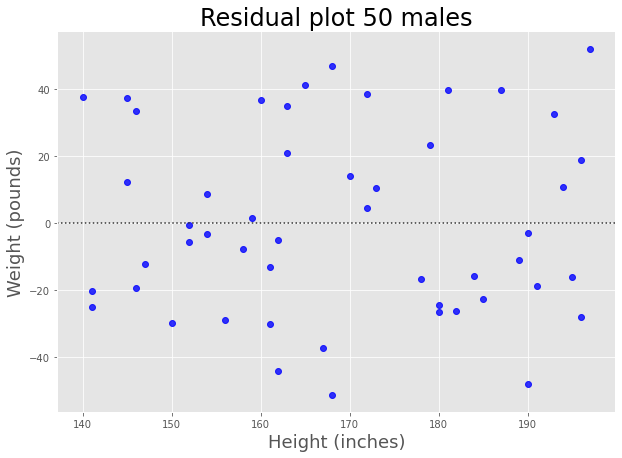

In [57]:
df_males = df[df['Gender'] == 'Male'].sample(50)
fig = plt.figure(figsize=(10, 7))
sns.residplot(df_males.Height, df_males.Weight, color='blue')
plt.title('Residual plot 50 males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);